# Занятие 1

1. Немного про наш семестр
2. Связные списки
3. Pandas. Часть 0. Знакомство с библиотекой. ipython tips.


# Связные списки


Ещё классы можно использовать, если вам захочется написать какую-то свою структуру данных. Например, связный список. Это базовый примитив в программировании, которые часто любят использовать для демонстрации каких-нибудь алгоритмических задач. Они примечательны тем, что незваисимо от количества элементов в связном списке операция добавления элемента в начало списка всегда выполняется за некоторое (обычно небольшое) константное время



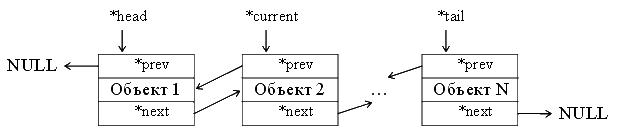

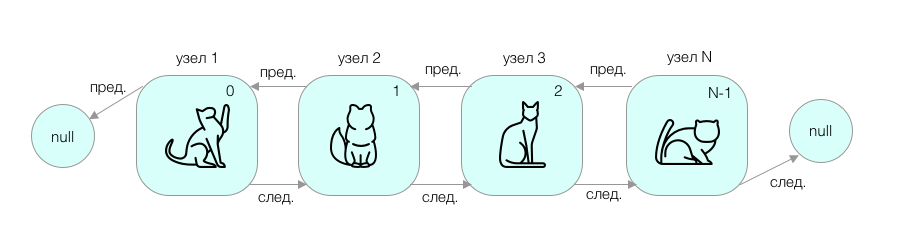

1. Проверять содержится ли в нем тот или иной элемент;
2. Добавлять узлы в конец;
3. Получать значение узла по индексу;
4. Удалять узлы.

Некоторыми преимуществами связного списка являются его прерывистый характер и время чтения, никогда не превышающее O(n). Связанный список не нужно хранить постоянно, потому что он имеет ссылки, встроенные в каждый узел, для расположения следующего по порядку. Если в памяти вашего компьютера мало места, идеально подойдет связанный список, поскольку всю структуру не нужно хранить в одном месте. Это также означает, что чтение связанного списка является линейным, поскольку размер списка приближается к бесконечности.



Простой пример односвязного списка:

Односвязный список состоит из нескольких узлов, каждый из которых содержит а) данные и б) ссылку на следующий узел.



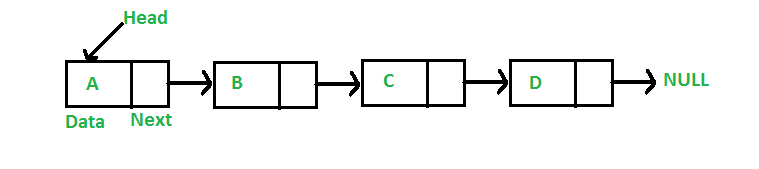

In [45]:
class Node(object):
    def __init__(self, value=None, next_node=None):
        self.value = value
        self.next = next_node

    def __str__(self):
        return f"[Node with value {self.value}]"


def print_linked_list(head):
    cur = head
    while cur is not None:
        print(cur)
        cur = cur.next

In [46]:
h, a, b, c, d = Node(1), Node(2), Node(3), Node("Внезапно"), Node(5)

h.next = a
a.next = b
b.next = c
c.next = d

print_linked_list(h)

[Node with value 1]
[Node with value 2]
[Node with value 3]
[Node with value Внезапно]
[Node with value 5]


Двухсвязный список

В двусвязном списке каждый узел содержит данные, ссылку на узел, после него, и ссылку на узел, предшествующий ему.



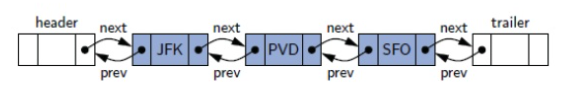

https://coderlessons.com/tutorials/python-technologies/izuchite-strukturu-dannykh-python/python-sviazannye-spiski

https://github.com/aspittel/coding-cheat-sheets/blob/master/data_structures/linked_lists.md

# ПАНДЫ

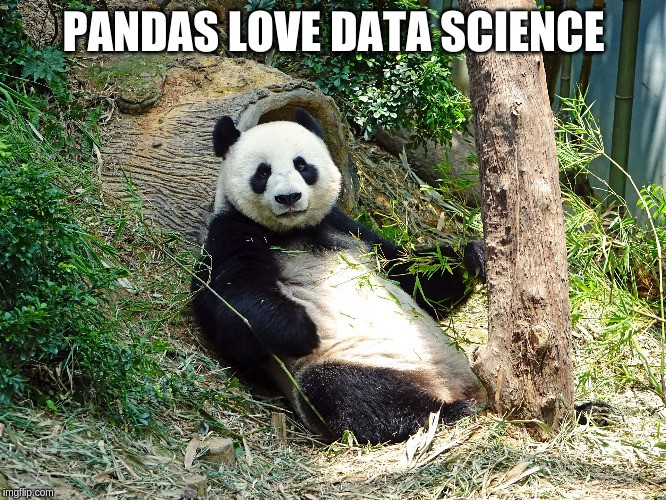

Pandas - Библиотека для анализа данных и манипяций с ними. Во многих местах из себя представляет фортрановские модули, к которым написаны биндинги для питона. Из-за этого работает очень быстро с одной стороны и много чего умеет, с другой. Например:



Легко умеет обрабатывать случаи когда в исходном файле какая-то ерунда в некоторых ячейках
Можно сливать данные, перемешивать колонки, вырезать и по-всячески манипуляровать ими
Очень интуитивна. Когда наловчишься

## Data Frame

Начнём с "табличного" формата. Он в пандас называется Data Frame и это в принципе не обязательно гомогенная структура данных с подписанными осями. На колонках и строчках можно делать массовые операции.



In [47]:
# Так как постоянно писать пять букв влом, обычно используют
# конструкцию "import as", чтобы писать только две
import pandas as pd

Дальше нам доступны все функции pandas. У неё, например, есть много способов прочитать данные и загрузить их в датафрейм. Можно читать excel, csv, json и тому подобное. Мы будем рассматривать работу с pandas на примере другого популярного датасета, в котором официант на протяжении нескольких месяцев записывал подробности о тех, кого он обслуживал, и как много ему давали на чай.



In [ ]:
"/data/tips.csv"

In [141]:
df = pd.read_csv(path)


In [49]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [52]:
df.head(2)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [55]:
df.tail(1)


,total_bill,tip,sex,smoker,day,time,size
243,18.78,3.0,Female,No,Thur,Dinner,2


Узнать что там за колонки можно, подсмотрев "что это за оси"



In [58]:
df.axes


[RangeIndex(start=0, stop=244, step=1),
 Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')]

Если интересует только индекс, можно посмотреть информацию только про него



In [59]:
df.index


RangeIndex(start=0, stop=244, step=1)

Данные не обязательно должны быть однотипные но когда это так, то pandas догадывается как их хранить. При этом строкоые константы чаще всего хранятся как тип "объект"



In [60]:
df.dtypes


total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [61]:
df.get_dtype_counts()


AttributeError: 'DataFrame' object has no attribute 'get_dtype_counts'

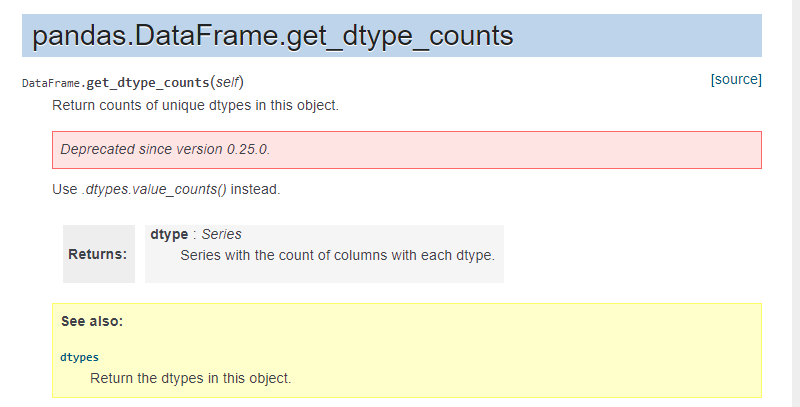

In [62]:
df.dtypes.value_counts()

object     4
float64    2
int64      1
dtype: int64

Размеры датасета можно узнать по свойству shape



In [63]:
df.shape


(244, 7)

Совсем белково-дружелюбный вариант можно получить из методов describe или info



In [64]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [65]:
df.describe()


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Можно выделять отдельные колонки, смотреть на уникальные значения в колонках, сортировать их, и производить над ними всякие математические операцци en masse



In [66]:
df["sex"].value_counts()


Male      157
Female     87
Name: sex, dtype: int64

In [67]:
df.sex.value_counts()


Male      157
Female     87
Name: sex, dtype: int64

In [68]:
df["day"].nunique()


4

In [69]:
df["time"].unique()


array(['Dinner', 'Lunch'], dtype=object)

In [73]:
df.sort_values("tip", ascending=False).head()


,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6


In [74]:
df.sort_values("total_bill", ascending=False).head()


,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
182,45.35,3.50,Male,Yes,Sun,Dinner,3


In [75]:
df.sort_values(["sex", "time", "tip"], inplace=True)
df.head()

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
0,16.99,1.01,Female,No,Sun,Dinner,2
215,12.90,1.10,Female,Yes,Sat,Dinner,2


In [76]:
df["total_bill"].head()


67      3.07
92      5.75
111     7.25
0      16.99
215    12.90
Name: total_bill, dtype: float64

In [77]:
(df["total_bill"] * 60.4).head()


67      185.428
92      347.300
111     437.900
0      1026.196
215     779.160
Name: total_bill, dtype: float64

In [78]:
df["total_bill"].add(100)
df["total_bill"].sub(100)
df["total_bill"].mul(42)
df["total_bill"].div(42)

df["total_bill"].mul(70.4).head()

67      216.128
92      404.800
111     510.400
0      1196.096
215     908.160
Name: total_bill, dtype: float64

В качестве индекса можно вместо номера строки использовать одну из колонок. Если у вас данные категорийные и неуникальные, то по такому индексу могут будут доступны сразу несколько записей



In [79]:
df = pd.read_csv("tips.csv", index_col="time")
df.head()

,total_bill,tip,sex,smoker,day,size
time,,,,,,
Dinner,16.99,1.01,Female,No,Sun,2
Dinner,10.34,1.66,Male,No,Sun,3
Dinner,21.01,3.50,Male,No,Sun,3
Dinner,23.68,3.31,Male,No,Sun,2
Dinner,24.59,3.61,Female,No,Sun,4


In [80]:
df.loc["Dinner"].head()


,total_bill,tip,sex,smoker,day,size
time,,,,,,
Dinner,16.99,1.01,Female,No,Sun,2
Dinner,10.34,1.66,Male,No,Sun,3
Dinner,21.01,3.50,Male,No,Sun,3
Dinner,23.68,3.31,Male,No,Sun,2
Dinner,24.59,3.61,Female,No,Sun,4


In [81]:
df.loc["Lunch"].head()


,total_bill,tip,sex,smoker,day,size
time,,,,,,
Lunch,27.20,4.00,Male,No,Thur,4
Lunch,22.76,3.00,Male,No,Thur,2
Lunch,17.29,2.71,Male,No,Thur,2
Lunch,19.44,3.00,Male,Yes,Thur,2
Lunch,16.66,3.40,Male,No,Thur,2


In [82]:
df.index.unique()

Index(['Dinner', 'Lunch'], dtype='object', name='time')

In [83]:
"Lunch" in df.index


True

In [84]:
"Breakfast" in df.index


False

Если очень хочется доступ по номеру записи, то можно сделать iloc



In [85]:
df.iloc[23]


total_bill    39.42
tip            7.58
sex            Male
smoker           No
day             Sat
size              4
Name: Dinner, dtype: object

In [86]:
df.iloc[[2, 4, 23]]


,total_bill,tip,sex,smoker,day,size
time,,,,,,
Dinner,21.01,3.50,Male,No,Sun,3
Dinner,24.59,3.61,Female,No,Sun,4
Dinner,39.42,7.58,Male,No,Sat,4


In [87]:
df.iloc[22:27]


,total_bill,tip,sex,smoker,day,size
time,,,,,,
Dinner,15.77,2.23,Female,No,Sat,2
Dinner,39.42,7.58,Male,No,Sat,4
Dinner,19.82,3.18,Male,No,Sat,2
Dinner,17.81,2.34,Male,No,Sat,4
Dinner,13.37,2.00,Male,No,Sat,2


Фильтрация в пандас такая же как в numpy (Про нампи мы поговорим с вами позднее)



In [88]:
df[df["sex"] == "Female"].head(7)


,total_bill,tip,sex,smoker,day,size
time,,,,,,
Dinner,16.99,1.01,Female,No,Sun,2
Dinner,24.59,3.61,Female,No,Sun,4
Dinner,35.26,5.00,Female,No,Sun,4
Dinner,14.83,3.02,Female,No,Sun,2
Dinner,10.33,1.67,Female,No,Sun,3
Dinner,16.97,3.50,Female,No,Sun,3
Dinner,20.29,2.75,Female,No,Sat,2


Маски можно комбинировать, это удобно для ответа на запросы о данных. Например, мы хотим узнать как дают на чай некурящие девушки по субботы



In [89]:
le_masque = df["sex"] == "Female"
le_masque = le_masque & (df["day"] == "Sat")
le_masque &= df["smoker"] == "No"
df[le_masque].head()

,total_bill,tip,sex,smoker,day,size
time,,,,,,
Dinner,20.29,2.75,Female,No,Sat,2
Dinner,15.77,2.23,Female,No,Sat,2
Dinner,19.65,3.00,Female,No,Sat,2
Dinner,15.06,3.00,Female,No,Sat,2
Dinner,20.69,2.45,Female,No,Sat,4


In [90]:
df[le_masque]["tip"].describe()


count    13.000000
mean      2.724615
std       0.961904
min       1.000000
25%       2.230000
50%       2.750000
75%       3.000000
max       4.670000
Name: tip, dtype: float64

Уже можно придумывать желтушные заголовки вида «75% некурящих девушек по субботам дают на чай не больше 3 тугриков»



## Pandas series


In [91]:
tea_list = ["чёрный", "зелёный", "травяной", "экспериментальный"]
pd.Series(tea_list) # то же самое что pd.Series(data=tea_list)

0               чёрный
1              зелёный
2             травяной
3    экспериментальный
dtype: object

In [92]:
list_of_ints  = [100,200,300]
pd.Series(list_of_ints)

0    100
1    200
2    300
dtype: int64

In [93]:
mixed_list = [42, False, "Дратути", None, [9, 8], {"name": "Алёнушка"}]
pd.Series(mixed_list)

0                      42
1                   False
2                 Дратути
3                    None
4                  [9, 8]
5    {'name': 'Алёнушка'}
dtype: object

Если вы инициализируете ваш Series объект из словарика, то ключи будут индексами



In [94]:
simple_dict = {"first_name": "Сергей", 
               "last_name": "Шнуров",
               "age": 45}
s = pd.Series(simple_dict)
display(s)

first_name    Сергей
last_name     Шнуров
age               45
dtype: object

In [95]:
s['first_name']


'Сергей'

Понятно, что у объекта Series есть всякие операторы, методы и тому подобное



In [96]:
print(dir(s))


['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__long__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmatmul__', '

In [97]:
s.index


Index(['first_name', 'last_name', 'age'], dtype='object')

In [98]:
s.values


array(['Сергей', 'Шнуров', 45], dtype=object)

In [99]:
s = pd.Series(tea_list)
s.values

array(['чёрный', 'зелёный', 'травяной', 'экспериментальный'], dtype=object)

In [100]:
s =  pd.Series([2.03, 1.64, 1.87, 1.75])
s.sum()

7.29

In [101]:
s.product()


10.894806999999998

In [102]:
s.mean()


1.8225

В отличие от dict, Series.index может быть неуникальным и его можно определять после



In [103]:
colors_list = ["red", "blue", "green", "yellow"]
numbers = ["one", "two", "three", "four"]

# pd.Series(colors_list, numbers) 
# pd.Series(colors_list, index=numbers) 
pd.Series(data=colors_list, index=numbers)

one         red
two        blue
three     green
four     yellow
dtype: object

In [104]:
s = pd.Series(data=colors_list, index=["one"]*3 + ["two"])
s

one       red
one      blue
one     green
two    yellow
dtype: object

In [105]:
s["one"]


one      red
one     blue
one    green
dtype: object

In [106]:
s = pd.Series(colors_list)
s.is_unique

True

In [107]:
s.shape


(4,)

In [108]:
print(s.name)
s = pd.Series(colors_list, name="Блаблабла")
print(s.name)
print("---")
print(s)

None
Блаблабла
---
0       red
1      blue
2     green
3    yellow
Name: Блаблабла, dtype: object


In [109]:
s.sort_values()


1      blue
2     green
0       red
3    yellow
Name: Блаблабла, dtype: object

In [110]:
print(s.sort_values(ascending=False))


3    yellow
0       red
2     green
1      blue
Name: Блаблабла, dtype: object


In [111]:
print(s)
print("---")
s.sort_values(ascending=False, inplace=True)
print(s)

0       red
1      blue
2     green
3    yellow
Name: Блаблабла, dtype: object
---
3    yellow
0       red
2     green
1      blue
Name: Блаблабла, dtype: object


In [112]:
s.sort_index()


0       red
1      blue
2     green
3    yellow
Name: Блаблабла, dtype: object

In [113]:
s.sort_index(ascending=False)


3    yellow
2     green
1      blue
0       red
Name: Блаблабла, dtype: object

In [114]:
s.sort_index(inplace=True)
s

0       red
1      blue
2     green
3    yellow
Name: Блаблабла, dtype: object

In [115]:
s = pd.Series(colors_list)
'red' in s.values

True

In [116]:
0 in s.index


True

In [117]:
s[0]


'red'

In [118]:
s[[0, 2, 3]]


0       red
2     green
3    yellow
dtype: object

In [119]:
s.get(20, default="Непонятная штука")


'Непонятная штука'

In [120]:
s = pd.Series([2.31, 1.2, 2.55, 1.7, 4.4444, 1.41])
s

0    2.3100
1    1.2000
2    2.5500
3    1.7000
4    4.4444
5    1.4100
dtype: float64

In [121]:
print(s.count(), len(s), s.sum(), s.mean(), s.product())


6 6 13.6144 2.269066666666667 75.30339895847997


In [122]:
s.describe()


count    6.000000
mean     2.269067
std      1.184686
min      1.200000
25%      1.482500
50%      2.005000
75%      2.490000
max      4.444400
dtype: float64

In [123]:
i = s.idxmax()
print("Максимум лежит по индексу %s и это %s" % (i, s.get(i)))

Максимум лежит по индексу 4 и это 4.4444


In [124]:
s = pd.Series(["Маша", "Паша", "Саша", "Маша", "Маша"])
s.value_counts()

Маша    3
Паша    1
Саша    1
dtype: int64

In [125]:
s.value_counts().sum()


5

In [126]:
s.count() == s.value_counts().sum()


True

In [ ]:
s.value_counts(ascending=True)


In [ ]:
Ну и есть ещё полезные штуки map/apply:



In [127]:
s = pd.Series([2.31, 1.2, 2.55, 1.7, 4.4444, 1.41])
s

0    2.3100
1    1.2000
2    2.5500
3    1.7000
4    4.4444
5    1.4100
dtype: float64

In [128]:
def f(number):
    if number < 2.5:
        return "мало"
    return "МНОГО"

s.apply(f)

0     мало
1     мало
2    МНОГО
3     мало
4    МНОГО
5     мало
dtype: object

In [129]:
s.apply(lambda x: "%s штук" % x)


0      2.31 штук
1       1.2 штук
2      2.55 штук
3       1.7 штук
4    4.4444 штук
5      1.41 штук
dtype: object

In [130]:
s1 = pd.Series(data=["Маша", "Саша", "Паша", "Вася"])
s2 = pd.Series(
    data=[27, 12, 15, 70],
    index=["Маша", "Саша", "Паша", "Вася"])
s1.map(s2)

0    27
1    12
2    15
3    70
dtype: int64

In [131]:
s2_dict = s2.to_dict()


In [132]:
s2_dict["Паша"] = -13
s2_dict["Саша"] = 1000

In [133]:
s1.map(s2_dict)


0      27
1    1000
2     -13
3      70
dtype: int64

## Графики


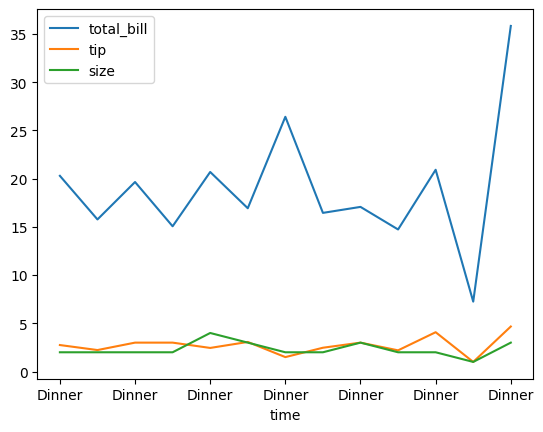

In [134]:
# %matplotlib inline
df[le_masque].plot();

/tmp/ipykernel_2941/613482439.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr());


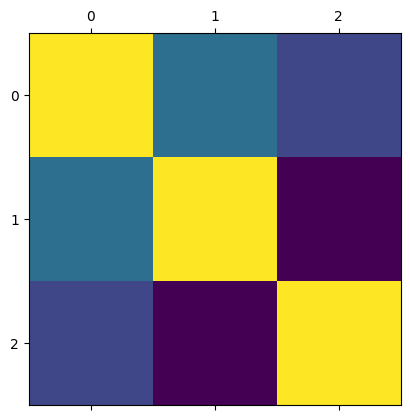

In [135]:
import matplotlib.pyplot as plt
# display(df.corr())
plt.matshow(df.corr());

In [137]:
corr = df.corr()
corr

/tmp/ipykernel_2941/2438084875.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


/tmp/ipykernel_2941/3203793570.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


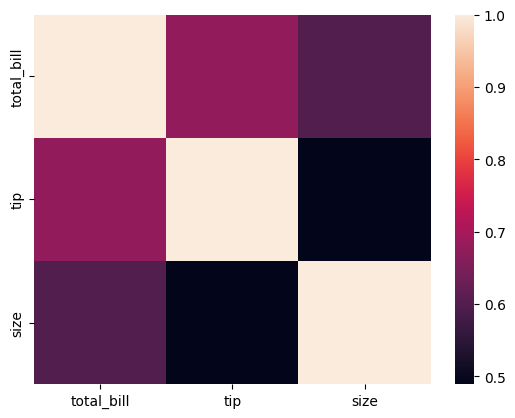

In [138]:
import seaborn as sns
corr = df.corr()
sns.heatmap(
    corr, 
    xticklabels=corr.columns.values, 
    yticklabels=corr.columns.values);

А ещё в seaborn есть функция загрузки "эталонных" датасетов. В частности, тот же iris. Ну и вообще в плане графиков для исследовательского анализа seaborn очень удобен



In [139]:
iris = sns.load_dataset('iris')
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [140]:
df

,total_bill,tip,sex,smoker,day,size
time,,,,,,
Dinner,16.99,1.01,Female,No,Sun,2
Dinner,10.34,1.66,Male,No,Sun,3
Dinner,21.01,3.50,Male,No,Sun,3
Dinner,23.68,3.31,Male,No,Sun,2
Dinner,24.59,3.61,Female,No,Sun,4
...,...,...,...,...,...,...
Dinner,29.03,5.92,Male,No,Sat,3
Dinner,27.18,2.00,Female,Yes,Sat,2
Dinner,22.67,2.00,Male,Yes,Sat,2


/mnt/c/ds/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/mnt/c/ds/env/lib/python3.8/site-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


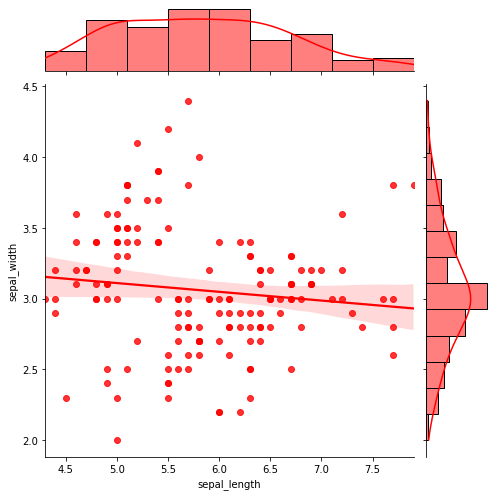

In [4]:
g = sns.jointplot("sepal_length",
                  "sepal_width", 
                  data=iris,
                  kind="reg",
                  color="r", size=7)

In [143]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [144]:
g = sns.jointplot("total_bill",
                  "tip", 
                  data=df,
                 
                  color="r", size=7)

TypeError: jointplot() got multiple values for argument 'data'

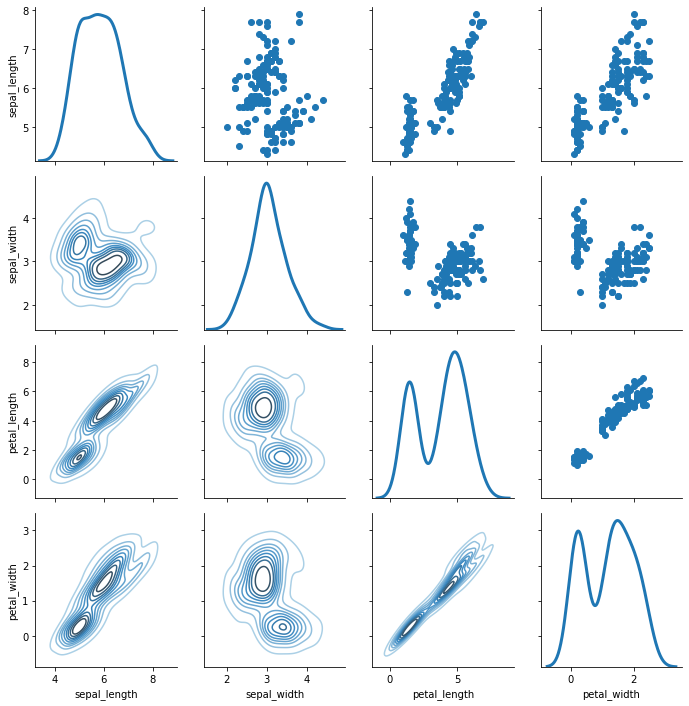

In [7]:
g = sns.PairGrid(iris, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3);

Этих инструментов достаточно чтобы решить большинство задач про базовый анализ данных. Попробуйте применить эти инструменты для своих данных. Если у вас не хватает идей, ищите их в интернете, вступайте в сообщество Open Data Science (оно живёт в слаке) и не ограничивайтесь русскоязычными ресурсами. 

## Закрепим основы Pandas

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Создадим DF

In [152]:
dates = pd.date_range('20130101',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.809055,0.205226,0.045239,0.172274
2013-01-02,0.074970,0.737414,-0.496258,-1.367547
2013-01-03,0.066304,-0.369449,0.854604,-0.888026
2013-01-04,0.662092,-0.922429,1.099825,-1.013202
2013-01-05,-1.103106,-0.143441,0.398333,-2.355399
2013-01-06,-0.182689,-1.308021,0.427391,-0.247850


In [ ]:
dates

In [ ]:
# другой способ создания фрейма данных


In [153]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
      'D' : np.array([3] * 4,dtype='int32'),
      'E' : 'foo' })
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,3,foo
1,1.0,2013-01-02,1.0,3,foo
2,1.0,2013-01-02,1.0,3,foo
3,1.0,2013-01-02,1.0,3,foo


In [154]:
df2.dtypes


A           float64
B    datetime64[ns]
C           float32
D             int32
E            object
dtype: object

In [155]:
df.head()


,A,B,C,D
2013-01-01,0.809055,0.205226,0.045239,0.172274
2013-01-02,0.074970,0.737414,-0.496258,-1.367547
2013-01-03,0.066304,-0.369449,0.854604,-0.888026
2013-01-04,0.662092,-0.922429,1.099825,-1.013202
2013-01-05,-1.103106,-0.143441,0.398333,-2.355399


In [156]:
df.index


DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [157]:
df.columns


Index(['A', 'B', 'C', 'D'], dtype='object')

In [158]:
df.values

array([[ 0.80905457,  0.20522552,  0.04523939,  0.17227377],
       [ 0.07497043,  0.73741428, -0.49625824, -1.36754673],
       [ 0.066304  , -0.36944916,  0.85460433, -0.88802615],
       [ 0.66209236, -0.92242866,  1.09982462, -1.01320169],
       [-1.1031056 , -0.14344138,  0.39833261, -2.35539855],
       [-0.182689  , -1.30802112,  0.42739139, -0.24785042]])

In [159]:
# quick data summary
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.054438,-0.300117,0.388189,-0.949958
std,0.683431,0.743551,0.570170,0.884289
min,-1.103106,-1.308021,-0.496258,-2.355399
25%,-0.120441,-0.784184,0.133513,-1.278960
50%,0.070637,-0.256445,0.412862,-0.950614
75%,0.515312,0.118059,0.747801,-0.407894
max,0.809055,0.737414,1.099825,0.172274


In [ ]:
Мы можем транспонировать индекс и столбцы.

In [163]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.809055,0.074970,0.066304,0.662092,-1.103106,-0.182689
B,0.205226,0.737414,-0.369449,-0.922429,-0.143441,-1.308021
C,0.045239,-0.496258,0.854604,1.099825,0.398333,0.427391
D,0.172274,-1.367547,-0.888026,-1.013202,-2.355399,-0.247850


In [164]:
# axis 0 is index, axis 1 is columns
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.172274,0.045239,0.205226,0.809055
2013-01-02,-1.367547,-0.496258,0.737414,0.074970
2013-01-03,-0.888026,0.854604,-0.369449,0.066304
2013-01-04,-1.013202,1.099825,-0.922429,0.662092
2013-01-05,-2.355399,0.398333,-0.143441,-1.103106
2013-01-06,-0.247850,0.427391,-1.308021,-0.182689


In [165]:
# Можно сортировать по значениям
df.sort(columns='B')

AttributeError: 'DataFrame' object has no attribute 'sort'

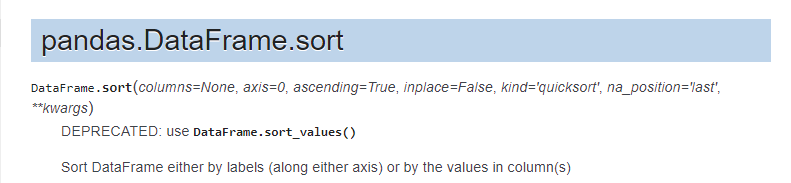

In [ ]:
sort() was deprecated for DataFrames in favor of either:

sort_values() to sort by column(s)
sort_index() to sort by the index

In [166]:
df.sort_values(by='A')

,A,B,C,D
2013-01-05,-1.103106,-0.143441,0.398333,-2.355399
2013-01-06,-0.182689,-1.308021,0.427391,-0.247850
2013-01-03,0.066304,-0.369449,0.854604,-0.888026
2013-01-02,0.074970,0.737414,-0.496258,-1.367547
2013-01-04,0.662092,-0.922429,1.099825,-1.013202
2013-01-01,0.809055,0.205226,0.045239,0.172274


##### Будьте внимательны когда копипастите код! Код может устареть

In [36]:

df.sort_values('B')

,A,B,C,D
2013-01-02,-0.495352,-1.999727,1.548480,-1.815939
2013-01-01,-1.902122,-1.471444,-0.527993,1.957404
2013-01-03,0.251564,-1.204505,0.359610,0.531269
2013-01-05,-0.212646,-0.199769,-0.602431,0.694602
2013-01-04,1.443400,0.006035,-2.459356,-0.938346
2013-01-06,-0.305863,1.220196,-0.022365,-0.059614


###### Выборки

In [167]:
# выбераем столбец (и получаем серию)
df['A']

2013-01-01    0.809055
2013-01-02    0.074970
2013-01-03    0.066304
2013-01-04    0.662092
2013-01-05   -1.103106
2013-01-06   -0.182689
Freq: D, Name: A, dtype: float64

In [168]:
df.A

2013-01-01    0.809055
2013-01-02    0.074970
2013-01-03    0.066304
2013-01-04    0.662092
2013-01-05   -1.103106
2013-01-06   -0.182689
Freq: D, Name: A, dtype: float64

In [169]:
df[0:3]

,A,B,C,D
2013-01-01,0.809055,0.205226,0.045239,0.172274
2013-01-02,0.074970,0.737414,-0.496258,-1.367547
2013-01-03,0.066304,-0.369449,0.854604,-0.888026


In [170]:
df['20130102':'20130104']


,A,B,C,D
2013-01-02,0.074970,0.737414,-0.496258,-1.367547
2013-01-03,0.066304,-0.369449,0.854604,-0.888026
2013-01-04,0.662092,-0.922429,1.099825,-1.013202


Основное различие между loc и iloc заключается в следующем:
loc основан на метках (label), что означает, что вы должны указать строки и столбцы на основе их меток строк и столбцов .
iloc основан на целочисленной позиции, поэтому вы должны указать строки и столбцы по их целочисленным значениям позиции (целочисленная позиция на основе 0).

Вот некоторые различия и сходства между loc и iloc:

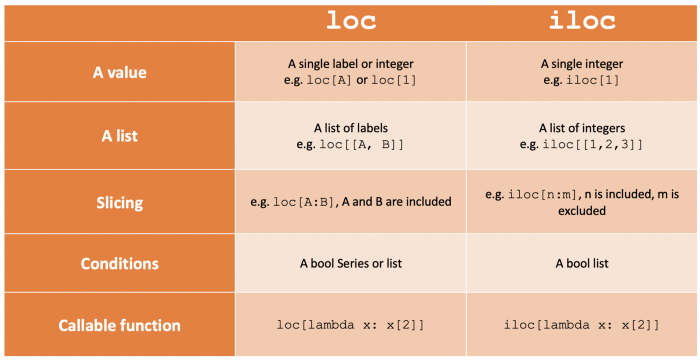

In [171]:
# cross-section using a label
df.loc[dates[0]]

A    0.809055
B    0.205226
C    0.045239
D    0.172274
Name: 2013-01-01 00:00:00, dtype: float64

In [172]:
# getting a scalar value
df.loc[dates[0], 'A']

0.8090545739832672

In [173]:
# select via position
df.iloc[3]

A    0.662092
B   -0.922429
C    1.099825
D   -1.013202
Name: 2013-01-04 00:00:00, dtype: float64

In [180]:
df.iloc[:5,:3]


,A,B,C
2013-01-01,0.809055,0.205226,0.045239
2013-01-02,0.074970,0.737414,-0.496258
2013-01-03,0.066304,-0.369449,0.854604
2013-01-04,0.662092,-0.922429,1.099825
2013-01-05,-1.103106,-0.143441,0.398333


In [181]:
# column slicing
df.iloc[:,1:3]

,B,C
2013-01-01,0.205226,0.045239
2013-01-02,0.737414,-0.496258
2013-01-03,-0.369449,0.854604
2013-01-04,-0.922429,1.099825
2013-01-05,-0.143441,0.398333
2013-01-06,-1.308021,0.427391


In [182]:
# get a value by index
df.iloc[1,1]

0.7374142775016409

In [183]:
# boolean indexing
df[df.A > 0]

,A,B,C,D
2013-01-01,0.809055,0.205226,0.045239,0.172274
2013-01-02,0.074970,0.737414,-0.496258,-1.367547
2013-01-03,0.066304,-0.369449,0.854604,-0.888026
2013-01-04,0.662092,-0.922429,1.099825,-1.013202


In [184]:
df[df > 0]

,A,B,C,D
2013-01-01,0.809055,0.205226,0.045239,0.172274
2013-01-02,0.074970,0.737414,NaN,NaN
2013-01-03,0.066304,NaN,0.854604,NaN
2013-01-04,0.662092,NaN,1.099825,NaN
2013-01-05,NaN,NaN,0.398333,NaN
2013-01-06,NaN,NaN,0.427391,NaN


In [185]:
# фильтрация
df3 = df.copy()
df3['E'] = ['one', 'one', 'two', 'three', 'four', 'three']

In [186]:
df3

,A,B,C,D,E
2013-01-01,0.809055,0.205226,0.045239,0.172274,one
2013-01-02,0.074970,0.737414,-0.496258,-1.367547,one
2013-01-03,0.066304,-0.369449,0.854604,-0.888026,two
2013-01-04,0.662092,-0.922429,1.099825,-1.013202,three
2013-01-05,-1.103106,-0.143441,0.398333,-2.355399,four
2013-01-06,-0.182689,-1.308021,0.427391,-0.247850,three


In [187]:
df3[df3['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,0.066304,-0.369449,0.854604,-0.888026,two
2013-01-05,-1.103106,-0.143441,0.398333,-2.355399,four


In [188]:
# setting examples
df.at[dates[0],'A'] = 0

df

,A,B,C,D
2013-01-01,0.000000,0.205226,0.045239,0.172274
2013-01-02,0.074970,0.737414,-0.496258,-1.367547
2013-01-03,0.066304,-0.369449,0.854604,-0.888026
2013-01-04,0.662092,-0.922429,1.099825,-1.013202
2013-01-05,-1.103106,-0.143441,0.398333,-2.355399
2013-01-06,-0.182689,-1.308021,0.427391,-0.247850


In [189]:
# Доступ к одному значению для пары строка/столбец по целочисленной позиции.
#Подобно ``iloc``, в том, что оба обеспечивают поиск на основе целых чисел. Используем
#``iat``, если вам нужно получить или установить только одно значение в DataFrame
df.iat[0,1] = 0
df


,A,B,C,D
2013-01-01,0.000000,0.000000,0.045239,0.172274
2013-01-02,0.074970,0.737414,-0.496258,-1.367547
2013-01-03,0.066304,-0.369449,0.854604,-0.888026
2013-01-04,0.662092,-0.922429,1.099825,-1.013202
2013-01-05,-1.103106,-0.143441,0.398333,-2.355399
2013-01-06,-0.182689,-1.308021,0.427391,-0.247850


In [113]:
df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.557227,5
2013-01-02,0.470155,-0.531771,-1.054221,5
2013-01-03,0.942104,1.851984,0.151428,5
2013-01-04,0.971650,-0.223680,0.114835,5
2013-01-05,0.831362,0.406755,0.936408,5
2013-01-06,0.270054,-0.620325,1.611765,5


In [190]:
# работа с отсутствующими данными
df4 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])
df4

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.045239,0.172274,NaN
2013-01-02,0.074970,0.737414,-0.496258,-1.367547,NaN
2013-01-03,0.066304,-0.369449,0.854604,-0.888026,NaN
2013-01-04,0.662092,-0.922429,1.099825,-1.013202,NaN


In [191]:
df4.loc[dates[0]:dates[1],'E'] = 1


In [107]:
df4

,A,B,C,D,E
2013-01-01,1.319339,0.635727,-0.557227,-0.303203,1.0
2013-01-02,0.470155,-0.531771,-1.054221,0.854868,1.0
2013-01-03,0.942104,1.851984,0.151428,-0.333586,NaN
2013-01-04,0.971650,-0.223680,0.114835,0.603906,NaN


In [192]:
# удалить строки с отсутствующими данными
df4.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.00000,0.000000,0.045239,0.172274,1.0
2013-01-02,0.07497,0.737414,-0.496258,-1.367547,1.0


In [193]:
# заполним недостающие данные
df4.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.045239,0.172274,1.0
2013-01-02,0.074970,0.737414,-0.496258,-1.367547,1.0
2013-01-03,0.066304,-0.369449,0.854604,-0.888026,5.0
2013-01-04,0.662092,-0.922429,1.099825,-1.013202,5.0


In [194]:
# boolean маска для значений nan
pd.isnull(df4)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


###### Operations


In [195]:
df.mean()


A   -0.080405
B   -0.334321
C    0.388189
D   -0.949958
dtype: float64

In [102]:
# pivot the mean calculation
df.mean(1)

2013-01-01    0.273659
2013-01-02   -0.065242
2013-01-03    0.652983
2013-01-04    0.366678
2013-01-05    0.536269
2013-01-06    0.652785
Freq: D, dtype: float64

In [196]:
# выравнивание объектов с разными размерами
s = pd.Series([1,3,5,np.nan,6,8],index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [197]:
df.sub(s,axis='index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-0.933696,-1.369449,-0.145396,-1.888026
2013-01-04,-2.337908,-3.922429,-1.900175,-4.013202
2013-01-05,-6.103106,-5.143441,-4.601667,-7.355399
2013-01-06,NaN,NaN,NaN,NaN


In [198]:
df

,A,B,C,D
2013-01-01,0.000000,0.000000,0.045239,0.172274
2013-01-02,0.074970,0.737414,-0.496258,-1.367547
2013-01-03,0.066304,-0.369449,0.854604,-0.888026
2013-01-04,0.662092,-0.922429,1.099825,-1.013202
2013-01-05,-1.103106,-0.143441,0.398333,-2.355399
2013-01-06,-0.182689,-1.308021,0.427391,-0.247850


In [199]:
# Функция apply
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,0.000000,0.045239,0.172274
2013-01-02,0.074970,0.737414,-0.451019,-1.195273
2013-01-03,0.141274,0.367965,0.403585,-2.083299
2013-01-04,0.803367,-0.554464,1.503410,-3.096501
2013-01-05,-0.299739,-0.697905,1.901743,-5.451899
2013-01-06,-0.482428,-2.005926,2.329134,-5.699750


In [200]:
df.apply(lambda x: x.max() - x.min())


A    1.765198
B    2.045435
C    1.596083
D    2.527672
dtype: float64

###### Merging / Grouping 


In [201]:
# Конкатенация
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.671818,1.244071,-0.266231,-1.869851
1,-1.962993,0.705022,0.545360,0.068496
2,-0.482896,1.604532,0.331663,0.844534
3,-2.601316,1.690048,1.790454,1.815039
4,-1.258326,0.160672,-0.521504,1.149688
5,0.869262,1.763630,0.775539,1.673329
6,-0.537791,-0.073477,-1.286227,0.095100
7,-0.030967,-0.064902,0.420667,0.463746
8,-1.975604,1.607052,-0.487579,-0.534552
9,0.374637,-0.209935,0.068628,-0.211188


In [202]:
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-0.671818,1.244071,-0.266231,-1.869851
1,-1.962993,0.705022,0.545360,0.068496
2,-0.482896,1.604532,0.331663,0.844534
3,-2.601316,1.690048,1.790454,1.815039
4,-1.258326,0.160672,-0.521504,1.149688
5,0.869262,1.763630,0.775539,1.673329
6,-0.537791,-0.073477,-1.286227,0.095100
7,-0.030967,-0.064902,0.420667,0.463746
8,-1.975604,1.607052,-0.487579,-0.534552
9,0.374637,-0.209935,0.068628,-0.211188


In [203]:
# SQL-style join
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [204]:
left

,key,lval
0,foo,1
1,foo,2


In [205]:
right

,key,rval
0,foo,4
1,foo,5


In [206]:
pd.merge(left, right, on='key')


,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [207]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
s = df.iloc[3]

In [208]:
df

,A,B,C,D
0,1.051908,0.036785,-0.641234,0.870791
1,0.375145,-0.309946,-0.213098,-1.531133
2,-0.688430,-1.835615,-0.525883,1.593772
3,-0.059069,0.111373,0.001426,-0.020785
4,0.372538,1.402220,-0.442878,-1.557772
5,0.802963,-1.254772,1.361114,-0.701486
6,-0.539437,-1.340136,0.460514,-0.064600
7,-2.266644,0.128497,1.059464,-1.029420


In [209]:
s

A   -0.059069
B    0.111373
C    0.001426
D   -0.020785
Name: 3, dtype: float64

In [210]:
df.append(s, ignore_index=True)

/tmp/ipykernel_2941/4011806271.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(s, ignore_index=True)


,A,B,C,D
0,1.051908,0.036785,-0.641234,0.870791
1,0.375145,-0.309946,-0.213098,-1.531133
2,-0.688430,-1.835615,-0.525883,1.593772
3,-0.059069,0.111373,0.001426,-0.020785
4,0.372538,1.402220,-0.442878,-1.557772
5,0.802963,-1.254772,1.361114,-0.701486
6,-0.539437,-1.340136,0.460514,-0.064600
7,-2.266644,0.128497,1.059464,-1.029420
8,-0.059069,0.111373,0.001426,-0.020785


In [212]:
df = pd.DataFrame(
    { 'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
      'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
      'C' : np.random.randn(8),
      'D' : np.random.randn(8) })
df

,A,B,C,D
0,foo,one,0.941504,-1.076551
1,bar,one,-2.974889,-0.330003
2,foo,two,-2.614128,-1.390617
3,bar,three,-1.314478,0.013296
4,foo,two,0.149504,1.627738
5,bar,two,-0.633009,-0.027768
6,foo,one,-1.457873,-0.933642
7,foo,three,-1.030914,0.321041


In [213]:
# Группировка
df.groupby('A').sum()

/tmp/ipykernel_2941/2897771778.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('A').sum()


,C,D
A,,
bar,-4.922376,-0.344475
foo,-4.011908,-1.452031


In [214]:
# Группировка по нескольким столбцам
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -2.974889 -0.330003
    three -1.314478  0.013296
    two   -0.633009 -0.027768
foo one   -0.516370 -2.010193
    three -1.030914  0.321041
    two   -2.464625  0.237121

In [215]:
df = pd.DataFrame(
    { 'A' : ['one', 'one', 'two', 'three'] * 3,
      'B' : ['A', 'B', 'C'] * 4,
      'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
      'D' : np.random.randn(12),
      'E' : np.random.randn(12)} )
df

,A,B,C,D,E
0,one,A,foo,-1.264793,0.077830
1,one,B,foo,0.722612,-0.814525
2,two,C,foo,0.099710,0.477411
3,three,A,bar,-0.672930,-2.195633
4,one,B,bar,-0.852982,-0.545166
5,one,C,bar,0.199256,-1.019626
6,two,A,foo,0.356642,0.236926
7,three,B,foo,0.293554,0.327728
8,one,C,foo,0.263252,-1.326814
9,one,A,bar,1.066824,-1.418249


In [74]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])


C             bar       foo
A     B                    
one   A -0.415801  0.443116
      B  0.312398  1.447184
      C  0.266996 -0.700168
three A -1.184709       NaN
      B       NaN  0.971678
      C  0.039396       NaN
two   A       NaN  0.002097
      B -0.844247       NaN
      C       NaN  0.358852

https://towardsdatascience.com/a-comparison-of-groupby-and-pivot-in-pythons-pandas-module-527909e78d6b

###### Plotting

<AxesSubplot: >

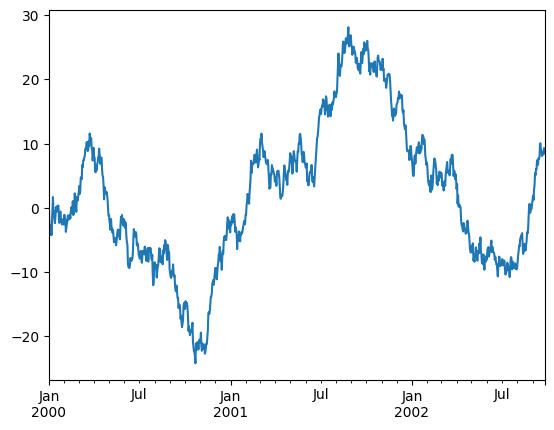

In [229]:
# time series plot
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 640x480 with 0 Axes>

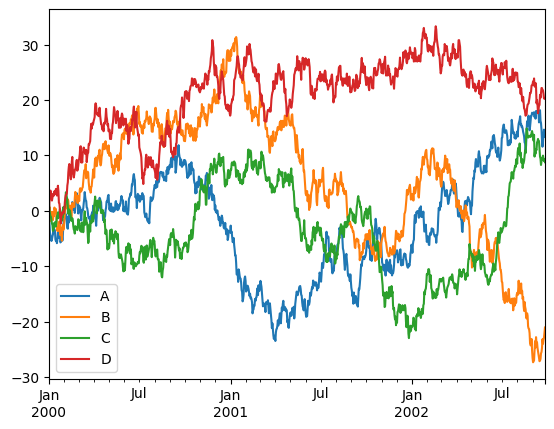

In [233]:
# plot with a data frame
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

###### Input / Output


In [ ]:
# Запиись в csc
df.to_csv('foo.csv', index=False)

In [ ]:
# Чтение нового файла
path = r'C:\Users\John\Documents\IPython Notebooks\foo.csv'
newDf = pd.read_csv(path)
newDf.head()

In [ ]:
# Уадление через знакомую вам уже библиотеку
import os
os.remove(path)

In [234]:
df

,A,B,C,D
2000-01-01,-0.800189,-0.355777,1.256831,-0.306814
2000-01-02,-2.296730,0.689668,0.215180,1.679594
2000-01-03,-3.955977,-0.493607,-0.523533,2.371432
2000-01-04,-4.519763,-1.852832,-1.050630,3.644807
2000-01-05,-5.014637,-0.594459,-1.108583,2.859467
...,...,...,...,...
2002-09-22,12.506617,-24.002937,9.956144,21.723222
2002-09-23,13.872130,-23.277772,9.413412,21.137981
2002-09-24,14.649044,-22.892524,9.000568,20.282788
2002-09-25,13.309946,-21.961133,9.262404,20.244535


In [235]:
# Тоже самое мы можем сделать через Эксель
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [236]:
newDf2 = pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])
newDf2.head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.800189,-0.355777,1.256831,-0.306814
1,2000-01-02,-2.296730,0.689668,0.215180,1.679594
2,2000-01-03,-3.955977,-0.493607,-0.523533,2.371432
3,2000-01-04,-4.519763,-1.852832,-1.050630,3.644807
4,2000-01-05,-5.014637,-0.594459,-1.108583,2.859467


###### Вкусности

In [239]:
from IPython.display import HTML, SVG, YouTubeVideo


In [240]:
HTML('''
<table style="border: 2px solid black;">
''' +
     ''.join(['<tr>' +
              ''.join([f'<td>{row},{col}</td>'
                       for col in range(5)]) +
              '</tr>' for row in range(5)]) +
     '''
</table>
''')

"0,0","0,1","0,2","0,3","0,4"
"1,0","1,1","1,2","1,3","1,4"
"2,0","2,1","2,2","2,3","2,4"
"3,0","3,1","3,2","3,3","3,4"
"4,0","4,1","4,2","4,3","4,4"


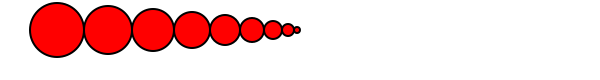

In [241]:
SVG('''<svg width="600" height="80">''' +
    ''.join([f'''<circle
              cx="{(30 + 3*i) * (10 - i)}"
              cy="30"
              r="{3. * float(i)}"
              fill="red"
              stroke-width="2"
              stroke="black">
        </circle>''' for i in range(10)]) +
    '''</svg>''')

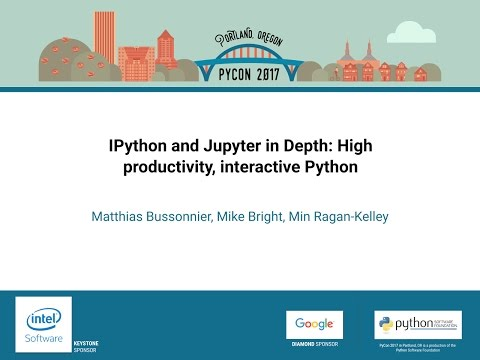

In [242]:
YouTubeVideo('VQBZ2MqWBZI')


In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [243]:
url = ("https://raw.githubusercontent.com/"
       "ipython-books/cookbook-2nd-data/"
       "master/bikes.csv")

In [244]:
df = pd.read_csv(url, index_col='Date',
                 parse_dates=True, dayfirst=True)

In [44]:
df.head(2)


,Unnamed: 1,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
Date,,,,,,,,,
2013-01-01,00:00,0,0,1,0,6,0,1,0
2013-01-02,00:00,69,0,13,0,18,0,2,0


<AxesSubplot: xlabel='Date'>

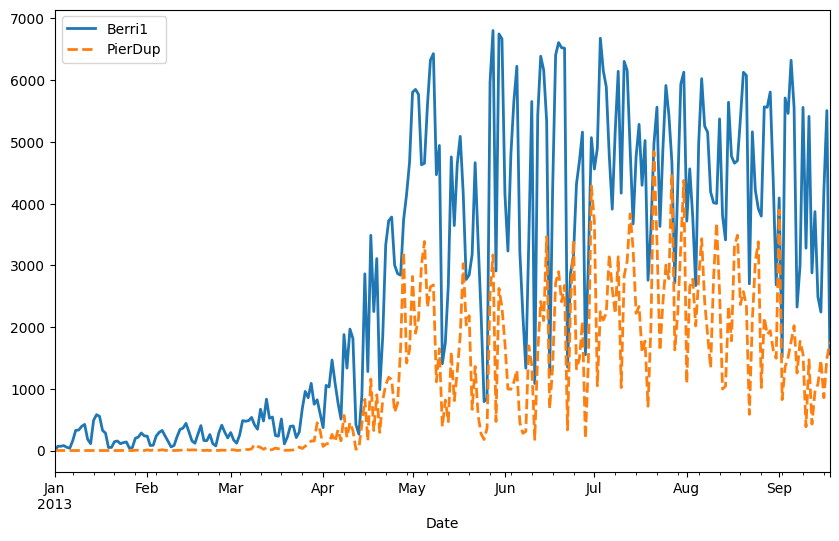

In [245]:
df[['Berri1', 'PierDup']].plot(figsize=(10, 6),
                               style=['-', '--'],
                               lw=2)

In [246]:
df_week = df.groupby(df.index.weekday).sum()

/tmp/ipykernel_2941/3221179638.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_week = df.groupby(df.index.weekday).sum()


In [247]:
df_week


,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
Date,,,,,,,,
0,106826,51646,68087,129982,69767,44500,119211,72883
1,117244,54656,76974,141217,74299,40679,123533,76559
2,120434,59604,79033,145860,80437,42564,125173,79501
3,115193,52340,76273,141424,73668,36349,120684,74540
4,105701,44252,71605,127526,64385,36850,118556,71426
5,75754,27226,45947,79743,35544,46149,97143,56438
6,74873,29181,40812,75746,37620,53812,100735,53798


/tmp/ipykernel_2941/4269678902.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


(0.0, 151791.7)

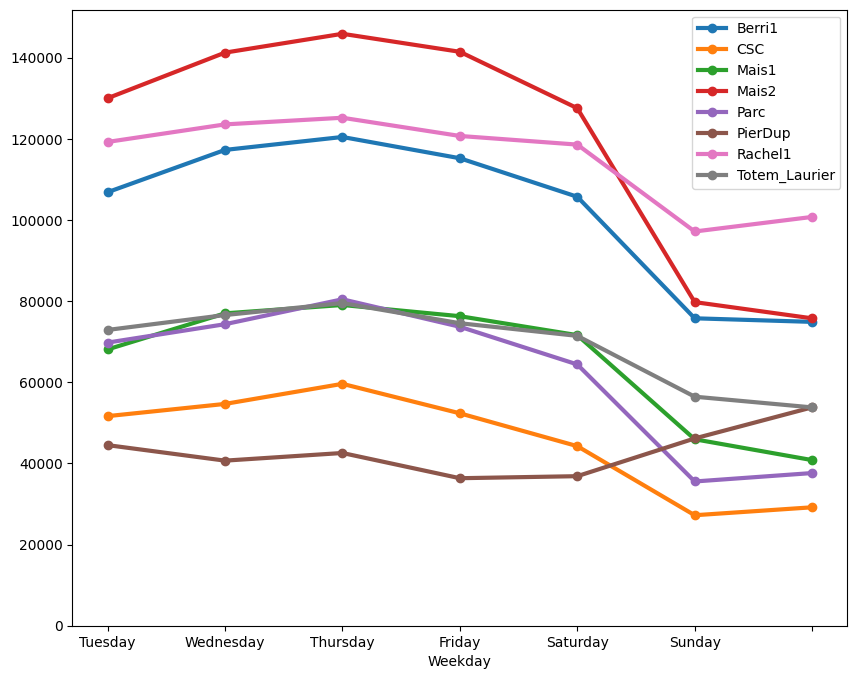

In [248]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_week.plot(style='-o', lw=3, ax=ax)
ax.set_xlabel('Weekday')
# We replace the labels 0, 1, 2... by the weekday
# names.
ax.set_xticklabels(
    ('Monday,Tuesday,Wednesday,Thursday,'
     'Friday,Saturday,Sunday').split(','))
ax.set_ylim(0)  # Set the bottom axis to 0.

In [249]:
from ipywidgets import interact

@interact
def plot(n=(1, 30)):
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    df['Berri1'].rolling(window=n).mean().plot(ax=ax)
    ax.set_ylim(0, 7000)
    plt.show()

interactive(children=(IntSlider(value=15, description='n', max=30, min=1), Output()), _dom_classes=('widget-in…

# ДЗ

###### Задача 1 Связанные списки

Напишите функцию (пусть онабудет называться reverse_linked_list), которая разворачивает связный список. На вход она принимает головную ноду, а на выход отдаёт хвостовую ноду исходного списка, но только теперь если попробовать пройтись по ней, она будет новой головной. С функцией из примера выше,



In [ ]:
print_linked_list(h)
h = reverse_linked_list(h)
print("---")
print_linked_list(h)

Напечатает



In [ ]:
[Node with value 1]
[Node with value 2]
[Node with value 3]
[Node with value Внезапно]
[Node with value 5]
---
[Node with value 5]
[Node with value Внезапно]
[Node with value 3]
[Node with value 2]
[Node with value 1]

Подсказка: вам понадобится "вспомогательная нода", куда вы будете переворачивать список. Можете написать вспомотаельную функцию которая "переворачивает ноду".



###### Задача 2 Пузырьки

Сортировкой пузырьком это один из самых простейших алгоритмов сортировки, который можно придумать. В базовом виде он подразумеват вложенный цикл и реализуется как-то так



In [ ]:
l = [2, 4, 1, 1, 2, 0]

for i in range(len(l)):
    for j in range(i, len(l)):
        if l[i] > l[j]:
            l[i], l[j] = l[j], l[i]

print(l)

Вам предлагается написать функцию, которая будет на вход получать голову несортированного связного списка, а на выход возвращать голову отсортированного.



Подсказка: так как в задании ничего не сказано про то, как должна вести себя функция, можете считать что можно просто менять значения, которые лежат в нодах, без замены их указателей. Или можете написать вспомогательную функцию, которая будет менять две ноды местами.



Эта задачка вполне может показаться вам запутанной и сложной. Но я советую всё равно её решить.



Ну ладно. В общем, такого рода задачки это типичные задачки которые стоит порешать, если вы серьёзно хотите примерить на себя шляпу программиста. Там помимо таких конструкций как вот эти вот связные списки будет ещё много чего другого интересно, например бинарные деревья, куча и хэш-таблицы (и много чего другого). Решение задачек на обработку таких структур доставляет своё изощрённое удовольствие. Не отказываете себе в нём // DA

###### Задача 3 Pandas

1) Выясните, сколько в среднем выходи полный счёт по пятницам на ланч у курящих мужчин (датасет tips)


2) Загрузите iris и посмотрите разбросы по всем числовым значениям для всех трёх классов цветов (датасет iris)


3) Создайте новый столбец с плотностью населения. Переименуйте названия первого и третьего столбца на русский язык

In [ ]:
df = pd.DataFrame({
     'country': ['Kazakhstan', 'Russia', 'Belarus', 'Ukraine'],
     'population': [17.04, 143.5, 9.5, 45.5],
     'square': [2724902, 17125191, 207600, 603628]
 })

In [ ]:
df['density']